# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Convert units to metric
units = "metric"

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
(f"Number of cities in the list: {len(cities)}")

'Number of cities in the list: 606'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "APPID=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | ilha de mocambique
Processing Record 6 of Set 1 | askoy
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | mota del cuervo
Processing Record 16 of Set 1 | rongelap
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | west island
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kavaratti,10.5669,72.6420,28.86,71,4,6.14,IN,1682268215
1,codrington,-38.2667,141.9667,10.71,87,0,3.09,AU,1682268216
2,blackmans bay,-43.0167,147.3167,7.51,85,34,2.80,AU,1682268041
3,yellowknife,62.4560,-114.3525,5.29,45,40,1.03,CA,1682268216
4,ilha de mocambique,-15.0342,40.7358,26.69,74,3,5.79,MZ,1682268216


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kavaratti,10.5669,72.6420,28.86,71,4,6.14,IN,1682268215
1,codrington,-38.2667,141.9667,10.71,87,0,3.09,AU,1682268216
2,blackmans bay,-43.0167,147.3167,7.51,85,34,2.80,AU,1682268041
3,yellowknife,62.4560,-114.3525,5.29,45,40,1.03,CA,1682268216
4,ilha de mocambique,-15.0342,40.7358,26.69,74,3,5.79,MZ,1682268216


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

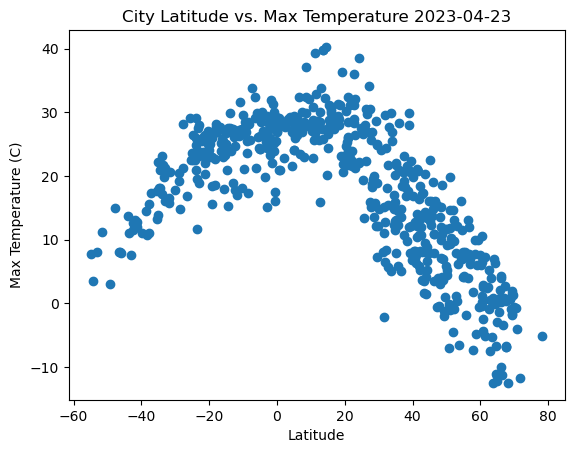

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y)

plot_date = date.today()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature {plot_date}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

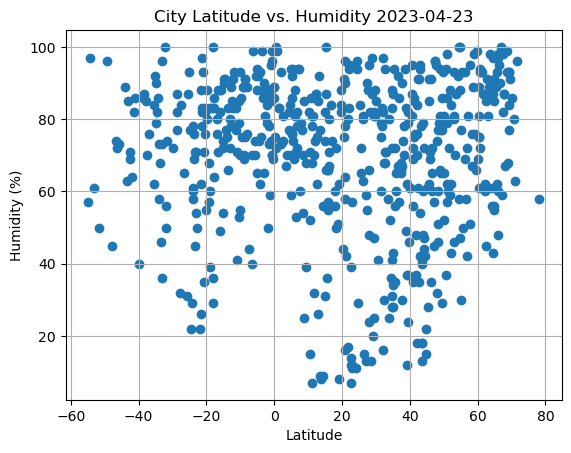

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {plot_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

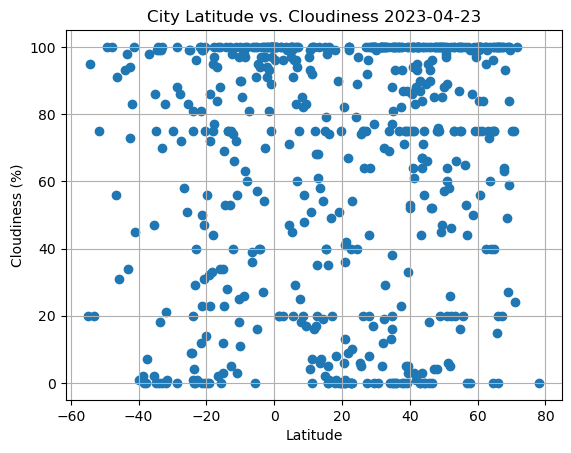

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {plot_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

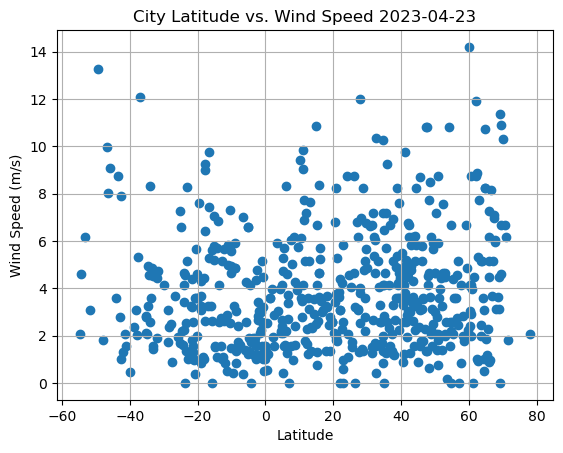

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {plot_date}")
#plt.marker(markeredgecolor="black")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def regress_plot(x, y, a, b):
    x = x
    y = y
    a = a
    b = b

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    print(f"The r-value is {rvalue}")
    plt.scatter(x,y)
    plt.xlabel(a)
    plt.ylabel(b)
    # Get regression values
    regress_values = x * slope + intercept

    # Slope equation and positioning on plot
    std_x = x.std()
    std_y = y.std()
    if rvalue >= 0:
        eq_x = x.mean()-5
        eq_y = y.mean()-std_y
    else:
        eq_x = x.mean()-5
        eq_y = y.mean()+std_y
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(eq_x,eq_y),fontsize=15,color="red")

    plt.plot(x,regress_values,"r-")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kavaratti,10.5669,72.6420,28.86,71,4,6.14,IN,1682268215
3,yellowknife,62.4560,-114.3525,5.29,45,40,1.03,CA,1682268216
5,askoy,60.4092,5.2260,10.53,89,75,4.12,NO,1682268216
6,college,64.8569,-147.8028,-12.18,55,75,8.23,US,1682268054
12,georgetown,5.4112,100.3354,25.96,94,20,1.54,MY,1682268127


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,codrington,-38.2667,141.9667,10.71,87,0,3.09,AU,1682268216
2,blackmans bay,-43.0167,147.3167,7.51,85,34,2.80,AU,1682268041
4,ilha de mocambique,-15.0342,40.7358,26.69,74,3,5.79,MZ,1682268216
7,adamstown,-25.0660,-130.1015,23.62,93,99,7.28,PN,1682268042
8,grytviken,-54.2811,-36.5092,3.50,97,95,4.61,GS,1682268216


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8600853583719396


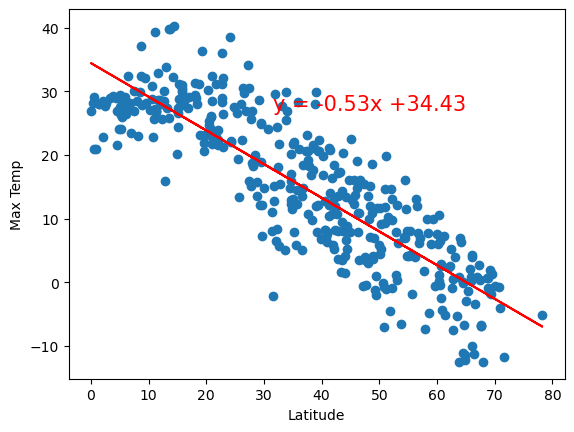

In [15]:
# Linear regression on Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is 0.7523727493517292


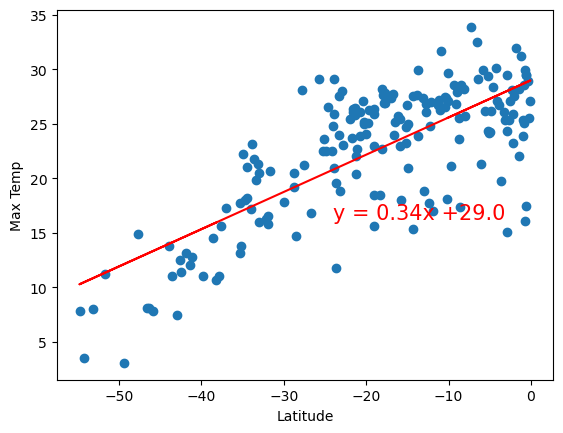

In [16]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** The Northern Hemisphere scatter plot portrays a negative correlation between Temperature and Latitude while the Southern Hemisphere scatter plot portrays a positive relationship. This outcome is expected as both show increased temperatures with increased proximity to the equator. After multiple iterations of random sampling the correlation coefficient can in general be considered significant.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.124828789009182


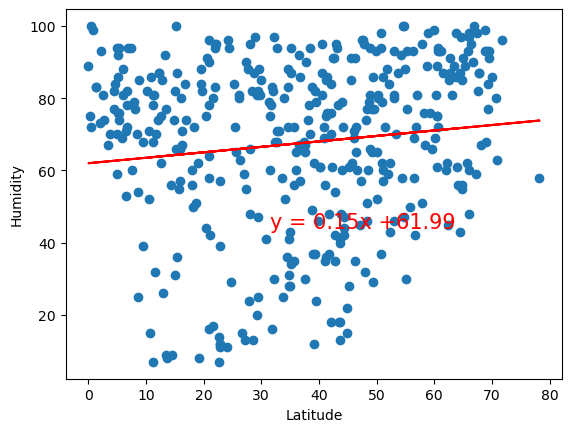

In [17]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is 0.18666346162396696


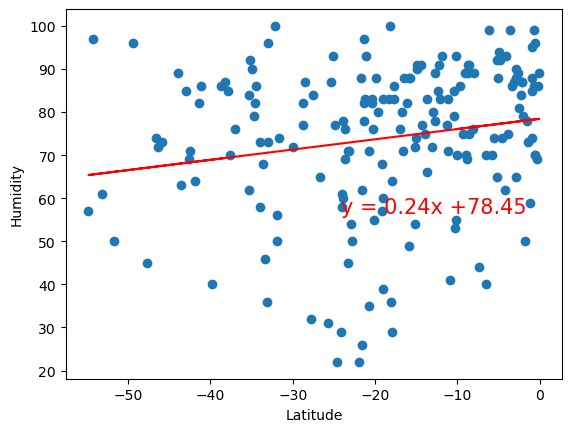

In [18]:
# Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** The relationship between Latitude and Humidity in both the Northen and Southern Hemispheres can be considered positive based on their respective correlation coefficients after multiple runs. In other words, humidity seems to increase with latitude regardless of the hemisphere. However, the plots and r-values suggest a weak correlation between the axes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1410344173900369


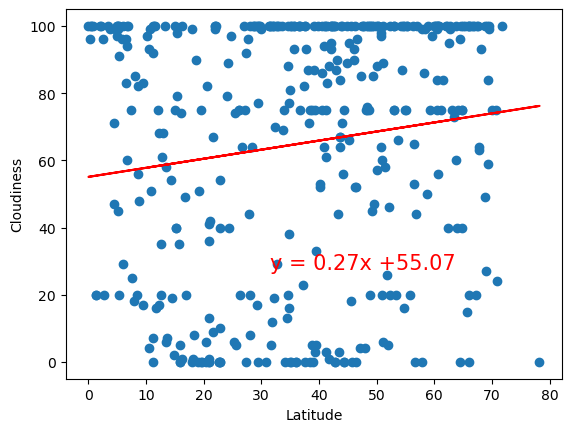

In [19]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is 0.24562134709441186


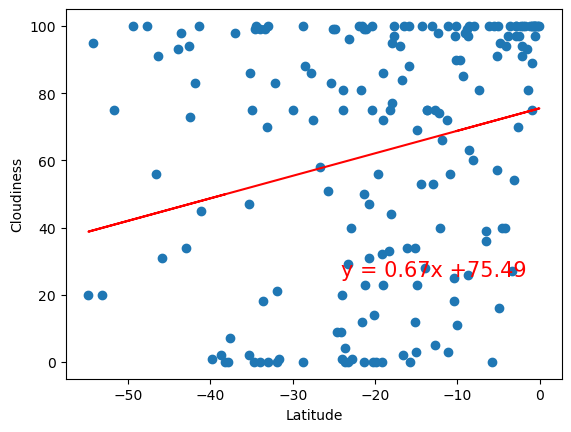

In [20]:
# Southern Hemisphere
regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Once again, the relationship between the axes in both hemisheres is apparently positive due to the correlation coefficient. However, based on the scatter plot, the correlation between Latitude and Cloudiness is weak or perhaps even non-existent.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.1270055546379133


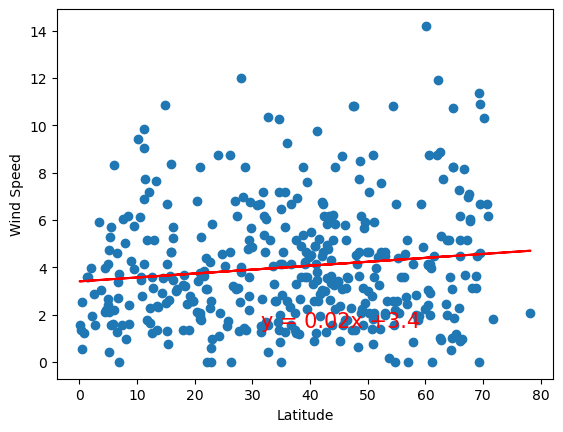

In [21]:
# Northern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is 0.1270055546379133


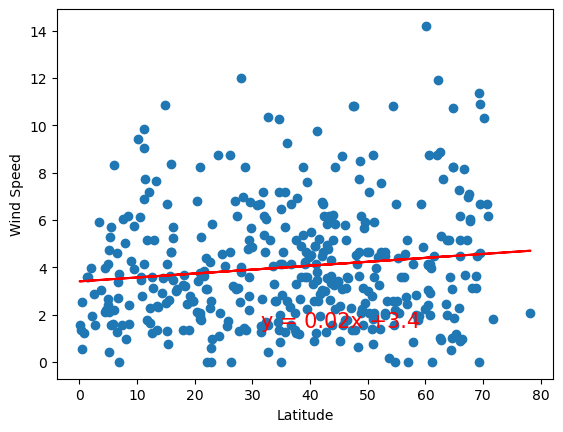

In [22]:
# Southern Hemisphere
regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Based on the correlation coefficients for both Northern and Southern Hemispheres, there appears to be no correlation between Wind Speed and Latitude 